In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [3]:
# Get the data which need to predict
df = pd.read_csv("50_Startups.csv")
print(df)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [12]:
# Splitting the DataFrame into training and testing sets with a 70-30 split ratio
# and specifying a random seed for reproducibility
train, test = train_test_split(df, test_size = 0.3, random_state=40)

# Split the data again to simplify the problem with curr practice
x_train = train[["Profit"]]
y_train = train[["R&D Spend"]]

x_test = test[["Profit"]]
y_test = test[["R&D Spend"]]

print(x_test)
print(y_test)

"""
x_train = train["Profit"]:
-This line of code assigns the column "Profit" from your train dataset to the variable x_train.
-The result is a Pandas Series containing the values of the "Profit" column.
-x_train will be a 1D array-like object.

x_train = train[["Profit"]]:
-This line of code assigns a DataFrame containing a single column, "Profit," from your train dataset to the variable x_train.
-The result is a Pandas DataFrame with one column.
-x_train will be a 2D DataFrame.
"""


       Profit
33   96778.92
29  101004.64
49   14681.40
38   81229.06
45   64926.08
0   192261.83
18  124266.90
4   166187.94
11  144259.40
2   191050.39
16  126992.93
35   96479.51
25  107404.34
21  111313.02
44   65200.33
    R&D Spend
33   55493.95
29   65605.48
49       0.00
38   20229.59
45    1000.23
0   165349.20
18   91749.16
4   142107.34
11  100671.96
2   153441.51
16   78013.11
35   46014.02
25   64664.71
21   78389.47
44   22177.74


'\nx_train = train["Profit"]:\n-This line of code assigns the column "Profit" from your train dataset to the variable x_train.\n-The result is a Pandas Series containing the values of the "Profit" column.\n-x_train will be a 1D array-like object.\n\nx_train = train[["Profit"]]:\n-This line of code assigns a DataFrame containing a single column, "Profit," from your train dataset to the variable x_train.\n-The result is a Pandas DataFrame with one column.\n-x_train will be a 2D DataFrame.\n'

In [13]:
# Create Linear Regression model
model = LinearRegression()

# Fit model to data
model.fit(x_train, y_train)



LinearRegression()

In [21]:
# Prediction
y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1, 1)
print(y_test["R&D Spend"].values.reshape(-1, 1))
print(y_pred)

[[ 55493.95]
 [ 65605.48]
 [     0.  ]
 [ 20229.59]
 [  1000.23]
 [165349.2 ]
 [ 91749.16]
 [142107.34]
 [100671.96]
 [153441.51]
 [ 78013.11]
 [ 46014.02]
 [ 64664.71]
 [ 78389.47]
 [ 22177.74]]
[[ 56925.61595757]
 [ 61785.54298667]
 [-37493.31299876]
 [ 39041.99259574]
 [ 20292.21902893]
 [166738.8489984 ]
 [ 88539.06336467]
 [136751.72188999]
 [111532.0896724 ]
 [165345.59293787]
 [ 91674.22302483]
 [ 56581.2697274 ]
 [ 69145.72657859]
 [ 73641.03142133]
 [ 20607.62918098]]
       Profit
33   96778.92
29  101004.64
49   14681.40
38   81229.06
45   64926.08
0   192261.83
18  124266.90
4   166187.94
11  144259.40
2   191050.39
16  126992.93
35   96479.51
25  107404.34
21  111313.02
44   65200.33


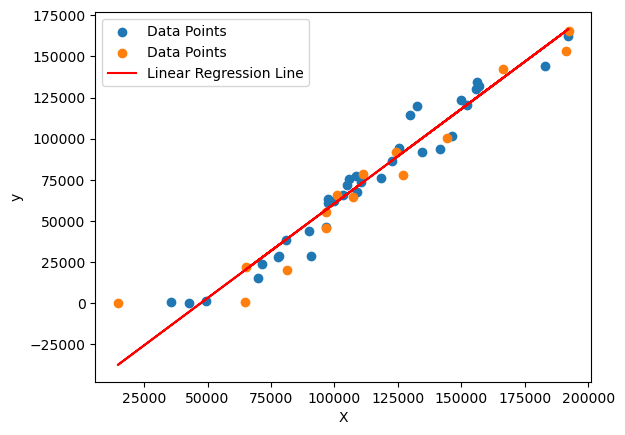

In [15]:
# Plot the data points and regression line
plt.scatter(x_train, y_train, label="Data Points")
plt.scatter(x_test, y_test, label="Data Points")
plt.plot(x_test["Profit"].values.reshape(-1, 1), y_pred, color='red', label="Linear Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [22]:
# Compute cost
# Calculate the Mean Squared Error (MSE) as the cost
mse = mean_squared_error(y_test["R&D Spend"].values.reshape(-1, 1)/1000, y_pred/1000)

# Print the MSE (cost)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 186.16204916630588


In [24]:

# Assuming y_true contains the true values and y_pred contains the predicted values
r_squared = r2_score(y_test["R&D Spend"].values.reshape(-1, 1), y_pred)

# Print the R-squared value
print("R-squared:", r_squared)


R-squared: 0.9264746135766566
